# DIGIT RECOGNIZER USING NEURAL NETWORKS

December 4, 2017

Welcome! This IPython notebook will go through the implementation of a Feedforward Neural Network to solve the famous Handwritten Digit Recognition problem.

# 1. Introduction

As a brief introduction, the task environment and the representation of the state is discussed below before diving into the discussion of the two search algorithms.

## 1.1 Handwritten Character Recognition

Handwritten character recognition is the ability of a device to process input handwritten characters taken from printed physical documents or handwritten characters written from a touchscreen. The input handwritten digits are usually in the form of an image or a real-time recognition using a camera for optical scanning. The input is then fed to a pattern-recognition software for the recognition process. This technology is often used to extract characters from old printed documents for those documents to have a soft copy. In addition, handwritten character recognition is also used to recognize handwritten characters written from a touchscreen.

## 1.2 Handwritten Digits

In this paper, we deal with a subset of handwritten characters which are handwritten digits. A database of handwritten digits, called MNIST database, is used to train and test a machine learning model for handwritten character recognition. In particular, the MNIST database is used in this paper to feed the feedforward neural network for training and testing. Furthermore, according to Yann LeCun, the MNIST database currently contains $60,000$ images for training and $10,000$ images for testing. The set of images in the MNIST database is the combination of two NIST databases: Special Database 1 and Special Database 2 which are gathered from American high school students and employees of the United States Census Bureau.

Further exploration and analysis of the MNIST dataset will be discussed in the methodology chapter below.

## 1.3 Objective

The aim of this paper is to build a feedforward neural network for handwritten digit recognition using the scikit-learn machine learning library.

# 2. Methodology

## 2.1 Data and Architecture

### 2.1.1 MNIST Dataset

As discussed in the previous chapter, the MNIST database contains $60,000$ training images and $10,000$ testing images. Each image contains features denoted as $X$ and target denoted as $y$.

Input $X$ is a matrix with a column size of $784$ and a row size depending on the number of images being fed to the feedforward neural net. Each row vector corresponds to each image of the MNIST data. An MNIST image, with $28x28$ pixel size, is flattened into a vector of $784$ pixels, where each pixel value has the range of $[0, 255]$, with $0$ being the hex color of $0x00$ and $255$ being the hex color of $0xFF$. As suggested by Ian Goodfellow, it is generally preferable to scale the pixel values to the range $[0, 1]$ for wider options of loss functions. Below is a collection of MNIST digits of the number $2$.

<img height="250" width="250" src="https://www.researchgate.net/profile/Guy_Mayraz/publication/2540340/figure/fig1/AS:279612820082697@1443676299495/Fig-2-Examples-of-2s-in-the-MNIST-database-first-100-examples-Note-the-very-diverse.png">

Similar to the input, target $y$ is a matrix where the row vectors of size $10$ are in a one-hot vector format. The one-hot vector format is a vector encoding where the vector is all-zero apart from one element. The index of the nonzero element dictates the category of the MNIST image. Each row vector corresponds to each of the MNIST examples.

*e.g.* An MNIST image containing the number $2$ has a target $y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]$. An MNIST image containing the number $9$ has a target $y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]$.

### 2.1.2 Architecture of the Neural Network

The feedforward neural network (ANN) contains an input layer, $XX$ hidden layer, and an output layer. The input layer has $784$ nodes, where each of the nodes corresponds to the pixel of an image. Preferably, the number of nodes in the hidden layer is between the number of nodes in the input layer and the number of nodes in the output layer. In our case, we chose an arbitrary number of $XX$ nodes for the hidden layer. Lastly, the output layer contains $10$ nodes corresponding to the one-hot vector format. The graph of the feedforward neural network is shown in the figure below. <h4> ##Ryan, create a drawing of our neural network## </h4>

Ideally, the output layer must be in a one-hot vector format where the layer’s nodes are all zero apart from one node. However, after the first forward propagation, it is expected that the output of the ANN is inaccurate. This is the reason we train the ANN; for its output to be as accurate as possible. The details and implementation of the training will be further discussed in the following sections.

## 2.2 Python Implementation

The feedforward neural network was implemented in scikit-learn, a machine learning library. The MNIST dataset was first retrieved from the scikit-learn collection of datasets.

In [5]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")

The dataset was then separated into a training set containing $60,000$ handwritten images, and a testing set containing $10,000$ handwritten images. We followed the training and testing data split of the original MNIST dataset since this was the best possible split of the MNIST dataset. We also further randomized the training and testing split. The training set contained the input $X_{train}$ and target $y_{train}$. The testing set also contained the input $X_{test}$ and target $y_{test}$. Moreover, since the original MNIST dataset input has pixel values of $0$ to $255$, we rescaled the input to make the input pixel values range from $0$ to $1$.

In [6]:
from sklearn.model_selection import train_test_split

X, y = mnist.data / 255., mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14285, random_state=42)

The ANN was then built using the built-in neural network model: MLPClassifier. The following parameters were used to configure the ANN. The solver we used for backpropagation was the *'sgd'* or stochastic gradient descent. The activation function we used was *‘logistic’*, known as the logistic sigmoid function. Moreover, we chose $3$ hidden layers each with $500$ neurons. Lastly, the maximum number of epochs or iterations for training was set to $100$. The number of epochs of $100$ was chosen so that the ANN converges to a near-zero error rate while not prolonging the training time. The other parameters were not adjusted and were left to its default setting.

In [2]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(500,500,500), activation='relu', max_iter=100, 
                    alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, 
                    learning_rate_init=0.1)

The ANN was then trained using the scikit-learn fit method. The ANN was trained using the $X_{train}$ and target $y_{train}$. The execution time was also measured for further analysis.

In [ ]:
import time

start = time.time()
mlp.fit(X_train, y_train)
end = time.time()

Lastly, after the training process, the ANN was tested using the scikit-learn score method. The ANN was tested for its accuracy score for both the training datasets and testing datasets.

In [ ]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
print("Execution time: %f" % (end - start))

# 3. Data and Analysis

The $10,000$ testing images were fed into our feedforward neural network to assess its performance. The images contain about $10,000$ images taken from the original NIST test set, which makes it more difficult to recognize. Clearly, the predictions of the model are used to assess its performance as shown in the latter part of this chapter. The distribution of the testing images is shown in the figure below.

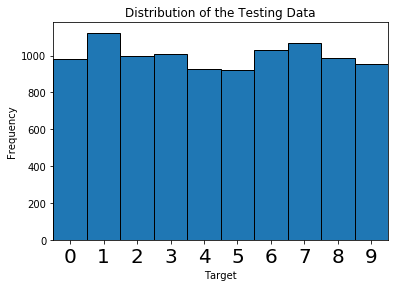

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
    
bins = range(11)
plt.hist(y_test, bins=bins)
bins_labels(bins, fontsize=20)

plt.title("Distribution of the Testing Data")
plt.xlabel("Target")
plt.ylabel("Frequency")

plt.show()

In [11]:
import bisect, itertools

To reduce code complexity, the nodes of a tree are objects with cost, state, and steps as attributes.

*COST (Integer) -->* cost of going from the initial state to current state.<br />
*STATE (List) -->* the current state of the environment as defined above.<br />
*STEPS (List) -->* the sequence of steps of the people leading to the current state.<br />

*e.g.* Given a Node $(10, [1,0,0,0], [1,3,3])$ means that the cost from initial state to current state, $[1,0,0,0]$, is 10. Moreover, the sequence of steps from initial state to current state is $[1,3,3]$, which means that 1 and 3 has crossed the bridge and 3 went back with the flashlight.

Notice that the inclusion of the steps attribute will aid with the identification of the path from the initial state to the goal state. With this, the sequence of steps of the solution can easily be printed out. The function print_steps uses the steps attribute to print the sequence of steps.

In [12]:
class Node:
    def __init__(self, cost, state, steps):
        self.cost = cost
        self.state = state
        self.steps = steps

    def __lt__(self, other):
        return self.cost < other.cost

    def print_steps(self):
        i = 0
        while i < len(self.steps):
            if (i+1) % 3 == 0:
                print(self.steps[i], '<-')
                i += 1
            else:
                print(self.steps[i], self.steps[i+1], '->')
                i += 2

<br />The code snippet below is the Tree class. This is the code representation of the state space. The class contains the following attributes:

*FRINGE (List) -->* collection of nodes yet to be expanded.<br />
*FITNESS (List) -->* the original input; a list of the time required for the people to cross the bridge.

The fringe initially contains the root node, which contains the initial state, a cost of 0 (since it is the root node), and an empty steps list. The different class methods will be explained after the code snippet below.

In [13]:
class Tree:
    def __init__(self, fitness):
        state = [0] * len(fitness)
        steps = []
        cost = 0
        root = Node(cost, state, steps)

        self.fringe = [root]
        self.fitness = fitness

    def has_repeated_states(self, node):
        for item in self.fringe:
            if node.state == item.state and node.cost < item.cost:
                self.fringe.remove(item)
                bisect.insort(self.fringe, node)
                return True
            if node.state == item.state:
                return True
        return False

    def generate_nodes(self, node):
        fitness_len = len(self.fitness)
        if len(node.steps) % 3 == 0:
            for elem in itertools.combinations(list(range(fitness_len)), 2):
                if (node.state[elem[0]] == 0 and node.state[elem[1]] == 0):
                    new_state = list(node.state)
                    new_state[elem[0]] = 1
                    new_state[elem[1]] = 1

                    new_steps = list(node.steps)
                    new_steps.extend([elem[0]+1, elem[1]+1])

                    new_cost = node.cost + max(self.fitness[elem[0]], self.fitness[elem[1]])

                    new_node = Node(new_cost, new_state, new_steps)

                    # Check for Repeated States
                    if not self.has_repeated_states(new_node):
                        bisect.insort(self.fringe, new_node)

        else:
            for elem in list(range(fitness_len)):
                if (node.state[elem] == 1):
                    new_state = list(node.state)
                    new_state[elem] = 0

                    new_steps = list(node.steps)
                    new_steps.append(elem+1)

                    new_cost = node.cost + self.fitness[elem]

                    new_node = Node(new_cost, new_state, new_steps)

                    # Check for Repeated States
                    if not self.has_repeated_states(new_node):
                        bisect.insort(self.fringe, new_node)

    def uniform_cost_search(self):
        num_visited = 0
        fitness_len = len(self.fitness)
        while True:
            if not self.fringe:
                return

            # Explore Fringe
            node = self.fringe.pop(0)
            num_visited += 1

            # Check for Goal State
            if node.state == [1] * fitness_len:
                print(node.cost, num_visited)
                node.print_steps()
                return

            # Generate Successor States
            self.generate_nodes(node)

<br />This class method contains the Uniform Cost Search algorithm. It continues to loop until either a goal state is found or if there exists no goal state. If the fringe is empty, then there exists no goal state. The algorithm continues to pop a node from the fringe and adds the successor nodes of that node inside the fringe while keeping the fringe sorted. As a modification to the algorithm, a loop counter was placed to identify the number of expanded nodes.

The successor nodes are generated by calling the class method generate_nodes with an argument of the popped node.

In [14]:
def uniform_cost_search(self):
        num_visited = 0
        fitness_len = len(self.fitness)
        while True:
            if not self.fringe:
                return

            # Explore Fringe
            node = self.fringe.pop(0)
            num_visited += 1

            # Check for Goal State
            if node.state == [1] * fitness_len:
                print(node.cost, num_visited)
                node.print_steps()
                return

            # Generate Successor States
            self.generate_nodes(node)

<br />The generate_nodes class method generates all possible successor nodes from the passed node argument. The usual argument being passed into this method is the recently popped node from the fringe.

In the search space, there are two types of state being generated: a state where two people cross the bridge, and a state where one person returns with the flashlight. Given this configuration, how is the type of a state being identified? This greatly utilizes the node attribute: node.steps. Notice that whenever the length of node.steps is a multiple of 3, then the recent move was a person returning with the flashlight. Therefore, the next move should be two people crossing the bridge. Likewise, if the length of node.steps is not a multiple of 3, then the recent move was two people crossing. Therefore, the next move should be a person crossing back.

*e.g.* Given node.steps $[1,3,1,4,2]$ means that 1 and 3 crossed the bridge, 1 returned, then 4 and 2 crossed the bridge. The length of this is not a multiple of 3, hence all possible successor states from this are states where one person crosses back with the flashlight.

For the type of state where two people cross the bridge, the itertools library was used. The library was used to generate all possible 2-Combination of fitness_len. This returns a list of 2-tuple which then was used to generate the successor nodes. The numbers inside the 2-tuple are basically the two people crossing the bridge. The node.step is then updated by changing 0s to a 1 (note that it is first checked if the two people have not crossed the bridge yet). The two people are also appended to the end of the node.steps. Lastly, node.cost is updated by adding the argument node's cost (path cost of the root to the parent node) with the max of the fitness of the two people.

The same principle happens with the type of state where one person returns. All possible successor nodes are generated (there is no need to use itertools here, a simple loop is enough): node.step is updated by changing 1s to a 0, the person gets appended to the end of node.step, and node.cost is updated by adding parent node's cost with the fitness of that person.

Lastly, before inserting the newly generated node into the fringe, repeated states must first be checked.

In [15]:
def generate_nodes(self, node):
        fitness_len = len(self.fitness)
        if len(node.steps) % 3 == 0:
            for elem in itertools.combinations(list(range(fitness_len)), 2):
                if (node.state[elem[0]] == 0 and node.state[elem[1]] == 0):
                    new_state = list(node.state)
                    new_state[elem[0]] = 1
                    new_state[elem[1]] = 1

                    new_steps = list(node.steps)
                    new_steps.extend([elem[0]+1, elem[1]+1])

                    new_cost = node.cost + max(self.fitness[elem[0]], self.fitness[elem[1]])

                    new_node = Node(new_cost, new_state, new_steps)

                    # Check for Repeated States
                    if not self.has_repeated_states(new_node):
                        bisect.insort(self.fringe, new_node)

        else:
            for elem in list(range(fitness_len)):
                if (node.state[elem] == 1):
                    new_state = list(node.state)
                    new_state[elem] = 0

                    new_steps = list(node.steps)
                    new_steps.append(elem+1)

                    new_cost = node.cost + self.fitness[elem]

                    new_node = Node(new_cost, new_state, new_steps)

                    # Check for Repeated States
                    if not self.has_repeated_states(new_node):
                        bisect.insort(self.fringe, new_node)

<br />The has_repeated_states class method checks if the state of a node (node.state) is already contained within the fringe. This is a crucial part of the Uniform Cost Search algorithm since a repeated state is to be avoided. The idea is to replace a node in a fringe with another node with the same state but with a cheaper cost. If node.state is in the fringe, the path cost to the node has to be checked. If it is less than the path cost of the node stored in the fringe, the node in the fringe has to be replaced. If it is not, nothing has to be done.

The has_repeated_states class method takes in a node as a parameter. The usual argument being passed into this method is a newly generated node from the generate_nodes method. The bisect library was also used to insert nodes into the fringe while keeping the fringe sorted.

In [16]:
def has_repeated_states(self, node):
        for item in self.fringe:
            if node.state == item.state and node.cost < item.cost:
                self.fringe.remove(item) # CHANGE this to remove(index)
                bisect.insort(self.fringe, node)
                return True
            if node.state == item.state:
                return True
        return False

## 1.2 A\* Search

First, we'll define a new class that is similar to the Node class written above. Note that we added a new attribute, evaluation_function, which equals the cost + heuristic. The evaluation_function attribute will be used to compare nodes to know which ones are cheaper instead of the cost attribute that was used earlier in Uniform Cost Search. The print_steps method is the same as before.

In [17]:
class Node_A_star:
    def __init__(self, cost, heuristic, state, steps):
        self.cost = cost
        self.evaluation_function = cost + heuristic
        self.state = state
        self.steps = steps

    def __lt__(self, other):
        return self.evaluation_function < other.evaluation_function

    def print_steps(self):
        i = 0
        while i < len(self.steps):
            if (i+1) % 3 == 0:
                print(self.steps[i], '<-')
                i += 1
            else:
                print(self.steps[i], self.steps[i+1], '->')
                i += 2

<br />Next, we'll define the Tree class that will be used for the A\* Search. We can notice a few changes as well.

In [28]:
class Tree_A_star:
    def __init__(self, fitness):
        state = [0] * len(fitness)
        steps = []
        cost = 0
        root = Node_A_star(cost, 0, state, steps)

        self.orig = fitness
        self.fringe = [root]
        self.fitness = sorted(fitness)

    def has_repeated_states(self, node):
        for item in self.fringe:
            if node.state == item.state and node.evaluation_function < item.evaluation_function:
                self.fringe.remove(item)
                bisect.insort(self.fringe, node)
                return True
            if node.state == item.state:
                return True
        return False
    
    def find_heuristic(self,node,place):
        l = []
        h = 0
        for elem in list(range(len(self.fitness))):
                if node.state[elem] == place:
                        l.append(self.fitness[elem])
        l = l[::-1]
        for elem in range(len(l),2):
                h += l[elem]
        return h
    
    def generate_nodes(self,node):
        fitness_len = len(self.fitness)
        if len(node.steps) % 3 == 0:
            h = self.find_heuristic(node,0)
            fin = []
            left = []
            c = 0
            for elem in range(fitness_len):
                    if node.state[elem] == 0:
                            left.append(elem)
                            c += 1
            a = left[0]
            b = left[1]           
            if c == 2:
                fin = [[a,b]]                
            else:
                c = left[-1]
                d = left[-2]
                fin = [[a,b],[a,c],[d,c]]
               
            c = 0
            for elem in fin:
                    new_state = list(node.state)
                    new_state[elem[0]] = 1
                    new_state[elem[1]] = 1
                    
                    new_steps = list(node.steps)
                    if(self.fitness[elem[0]]==self.fitness[elem[1]]):
                        for f in range(self.orig.index(self.fitness[elem[0]])+1,fitness_len):
                            if(self.fitness[elem[1]]==self.fitness[f]):
                                new_steps.extend([self.orig.index(self.fitness[elem[0]])+1, f+1])
                                break
                    else:
                        new_steps.extend([self.orig.index(self.fitness[elem[0]])+1, self.orig.index(self.fitness[elem[1]])+1])

                    new_cost = node.cost + max(self.fitness[elem[0]], self.fitness[elem[1]])
                    new_node = Node_A_star(new_cost, h , new_state, new_steps)
                    
                    if not self.has_repeated_states(new_node):
                            bisect.insort(self.fringe, new_node)
        else:
            h = self.find_heuristic(node,1)
            for elem in list(range(fitness_len)):
                if (node.state[elem] == 1):
                    new_state = list(node.state)
                    new_state[elem] = 0

                    new_steps = list(node.steps)
                    new_steps.append(self.orig.index(self.fitness[elem])+1)

                    new_cost = node.cost + self.fitness[elem]

                    new_node = Node_A_star(new_cost, h, new_state, new_steps)
                    
                    if not self.has_repeated_states(new_node):
                        bisect.insort(self.fringe, new_node)
                        
    def a_star(self):
        num_visited = 0;
        fitness_len = len(self.fitness)
        while True:
            if not self.fringe:
                return 'Failure'

            # Explore Fringe
            node = self.fringe.pop(0)
            num_visited += 1
            if node.state == [1] * fitness_len:
                print(node.cost, num_visited)
                node.print_steps()
                return 'Success'

            self.generate_nodes(node)

<br />The orig attribute will be used to keep track of the original indices of the input because we'll want the list sorted for later.

In [19]:
class Tree_A_star:
    def __init__(self, fitness):
        state = [0] * len(fitness)
        steps = []
        cost = 0
        root = Node_A_star(cost, 0, state, steps)

        self.orig = fitness
        self.fringe = [root]
        self.fitness = sorted(fitness)

<br />The has_repeated_states now uses the evaluation_function instead of the cost as described above.

In [20]:
def has_repeated_states(self, node):
    for item in self.fringe:
        if node.state == item.state and node.evaluation_function < item.evaluation_function:
            self.fringe.remove(item)
            bisect.insort(self.fringe, node)
            return True
        if node.state == item.state:
            return True
    return False

<br />We now look at our heuristic function. Here, we check where the flashlight is located with the place variable (it is 0 if the flashlight is on the initial side and 1 if it is on the goal side). Then, we take all persons on the selected side (the people that can cross the bridge) and store them in a list. This is where the list being sorted comes into play. We reverse the order of the sorted list so that the first element will be greater than or equal to the next item in the list and so on (i.e. c0 >= c1 >= c2 ... >= cn) and add up all even indexed elements in the list and return that value. 

In [21]:
def find_heuristic(self,node,place):
        l = []
        h = 0
        for elem in list(range(len(self.fitness))):
                if node.state[elem] == place:
                        l.append(self.fitness[elem])
        l = l[::-1]
        for elem in range(len(l),2):
                h += l[elem]
        return h    

<br />The reason for this heuristic is we want to minimize the wasted time crossing the bridge if the flashlight constraint was removed (if for example, it was actually daytime during the event).

But how does it work?

Since no one needs a flashlight while crossing the bridge, there's no reason for anyone to go back to help the others cross. And, we want to make the 2 people with the closest (or, just pretty close) travel time to cross the bridge together so that the time difference isn't too large.

For example, there are 4 people with travel time [1,2,5,10] respectively who want to cross the bridge. Only 2 people can be on the bridge at a time. Then, our heuristic function for this particular scenario is 10 + 2 = 12.

This is how we generate nodes. Since we sorted the list, we need a way to get its index from the original list. We use the orig attribute for this. The difference between generating nodes in Uniform Cost Search and A\* Search is we solve the heuristic and use that to get the evaluation_function of a node which will be used to compare the weights of the nodes.

In [22]:
def generate_nodes(self,node):
        fitness_len = len(self.fitness)
        if len(node.steps) % 3 == 0:
            h = self.find_heuristic(node,0)
            fin = []
            left = []
            c = 0
            for elem in range(fitness_len):
                    if node.state[elem] == 0:
                            left.append(elem)
                            c += 1
            a = left[0]
            b = left[1]           
            if c == 2:
                fin = [[a,b]]                
            else:
                c = left[-1]
                d = left[-2]
                fin = [[a,b],[a,c],[d,c]]
               
            c = 0
            for elem in fin:
                    new_state = list(node.state)
                    new_state[elem[0]] = 1
                    new_state[elem[1]] = 1
                    
                    new_steps = list(node.steps)
                    if(self.fitness[elem[0]]==self.fitness[elem[1]]):
                        for f in range(self.orig.index(self.fitness[elem[0]])+1,fitness_len):
                            if(self.fitness[elem[1]]==self.fitness[f]):
                                new_steps.extend([self.orig.index(self.fitness[elem[0]])+1, f+1])
                                break
                    else:
                        new_steps.extend([self.orig.index(self.fitness[elem[0]])+1, self.orig.index(self.fitness[elem[1]])+1])

                    new_cost = node.cost + max(self.fitness[elem[0]], self.fitness[elem[1]])
                    new_node = Node_A_star(new_cost, h , new_state, new_steps)
                    
                    if not self.has_repeated_states(new_node):
                            bisect.insort(self.fringe, new_node)
        else:
            h = self.find_heuristic(node,1)
            for elem in list(range(fitness_len)):
                if (node.state[elem] == 1):
                    new_state = list(node.state)
                    new_state[elem] = 0

                    new_steps = list(node.steps)
                    new_steps.append(self.orig.index(self.fitness[elem])+1)

                    new_cost = node.cost + self.fitness[elem]

                    new_node = Node_A_star(new_cost, h, new_state, new_steps)
                    
                    if not self.has_repeated_states(new_node):
                        bisect.insort(self.fringe, new_node)

<br />Then finally, to call the actual A\* Search, we use this method which is exactly the same as with its Uniform Cost Search counterpart.

In [23]:
def a_star(self):
        num_visited = 0;
        fitness_len = len(self.fitness)
        while True:
            if not self.fringe:
                return 'Failure'

            # Explore Fringe
            node = self.fringe.pop(0)
            num_visited += 1
            if node.state == [1] * fitness_len:
                print(node.cost, num_visited)
                node.print_steps()
                return 'Success'

            self.generate_nodes(node)

# 2. Input and Output

## 2.1 Uniform Cost Search Algorithm

### 2.1.1 Input: 1, 2, 5, 10

In [24]:
# import time
# t = time.process_time()

inp = [1,2,5,10]
tree = Tree(inp)
tree.uniform_cost_search()

# elapsed_time = time.process_time() - t
# print(elapsed_time)

# Expected execution time is approx. 0.0011 seconds

17 27
1 2 ->
1 <-
3 4 ->
2 <-
1 2 ->


### 2.1.2 Input: 1, 2, 5, 10, 3, 4, 14, 18, 20, 50

In [25]:
# import time
# t = time.process_time()

inp = [1,2,5,10,3,4,14,18,20,50]
tree = Tree(inp)
tree.uniform_cost_search()

# elapsed_time = time.process_time() - t
# print(elapsed_time)

# Expected execution time is approx. 9.77 seconds

104 7123
1 2 ->
1 <-
3 4 ->
2 <-
1 2 ->
1 <-
7 8 ->
2 <-
1 2 ->
1 <-
9 10 ->
2 <-
1 2 ->
1 <-
1 5 ->
1 <-
1 6 ->


### 2.1.3 Input: 1, 2, 5, 10, 12, 17, 24, 21, 20, 20, 11, 33, 15, 19, 55

In [ ]:
# import time
# t = time.process_time()

inp = [1,2,5,10,12,17,24,21,20,20,11,33,15,19,55]
tree = Tree(inp)
tree.uniform_cost_search()

# elapsed_time = time.process_time() - t
# print(elapsed_time)

# Expected execution time is approx. 19.58 hours

## 2.2 A\* Search Algorithm

### 2.2.1 Input: 1, 2, 5, 10

In [29]:
# import time
# t = time.process_time()

inp = [1,2,5,10]

state_space = Tree_A_star(inp)
state_space.a_star()

#elapsed_time = time.process_time() - t
#print(elapsed_time)

# Expected execution time is approx. 0.00031 seconds

17 18
1 2 ->
1 <-
3 4 ->
2 <-
1 2 ->


'Success'

### 2.2.2 Input: 1, 2, 5, 10, 3, 4, 14, 18, 20, 50

In [30]:
# import time
# t = time.process_time()

inp = [1,2,5,10,3,4,14,18,20,50]

state_space = Tree_A_star(inp)
state_space.a_star()

#elapsed_time = time.process_time() - t
#print(elapsed_time)

# Expected execution time is approx. 0.06762 seconds

104 507
1 2 ->
1 <-
9 10 ->
2 <-
1 2 ->
1 <-
7 8 ->
2 <-
1 2 ->
1 <-
3 4 ->
2 <-
1 2 ->
1 <-
1 5 ->
1 <-
1 6 ->


'Success'

### 2.2.3 Input: 1, 2, 5, 10, 12, 17, 24, 21, 20, 20, 11, 33, 15, 19, 55

In [31]:
# import time
# t = time.process_time()

inp = [1,2,5,10,12,17,24,21,20,20,11,33,15,19,55]

state_space = Tree_A_star(inp)
state_space.a_star()

#elapsed_time = time.process_time() - t
#print(elapsed_time)

# Expected execution time is approx. 3.28096 seconds

182 3285
1 2 ->
1 <-
12 15 ->
2 <-
1 2 ->
1 <-
8 7 ->
2 <-
1 2 ->
1 <-
9 10 ->
2 <-
1 2 ->
1 <-
6 14 ->
2 <-
1 2 ->
1 <-
5 13 ->
2 <-
1 2 ->
1 <-
4 11 ->
2 <-
1 2 ->
1 <-
1 3 ->


'Success'

# 3. Analysis and Conclusion

An appropriate criteria for comparing the two algorithms is by analyzing their time and space complexities, and their running time on a couple of inputs. The complexities of each algorithm will only serve as a theoretical comparison. The more interesting finding would come from the actual running time of the code implementing the two algorithms.

## 3.1 Time and Space Complexity

The time and space complexity of the Uniform Cost Search algorithm is: $O\left(b^{floor({\frac{C}{\epsilon }})}\right)$

On the other hand, the time and space complexity of A* algorithm is: $O\left(b^d\right)$

The symbols are defined as follows: $b$ is the branching factor of the search tree, $d$ is the least-cost depth of the search tree (*i.e.* the shortest path from root to a leaf node), $C$ is destination cost, and each edge cost is atleast $\epsilon$.

Both of the algorithms have an exponential complexity with a common base of $b$. An analysis of the complexities between the two is rather noncomplex; a comparison between the exponential terms would suffice. The floor of $C/\epsilon$ is the maximal possible depth an algorithm must traverse to reach a goal state. Clearly, the A\* algorithm is generally and theoretically the faster algorithm since $d$ is a cheaper cost then the floor of $C/\epsilon$.

As a conclusion, for all of the possible solvable problems, including the Bride Crossing Problem, A\* is the more efficient algorithm to use than the Uniform Cost Search. This is the theoretical standpoint of the problem, which would already suffice as an analysis and conclusion. However, the analysis of the problem majorly depends on the written code implementing the two algorithms.

## 3.2 Running Time of Code

As seen in Part 2 of this notebook, the two main code is tested with three different inputs of size 4, 10, and 15. Also, note that the execution time of the code is also specified in that Part written as a comment inside the code. As a context, each of the inputs were tested and timed using a 2.6 GHz Intel Core i5 machine.

The code for the Uniform Cost Search performed well for the input of size 4, accumulating an execution time of approximately 0.0011 seconds. The code also expanded 27 nodes which is relatively few. For the second input, with size 10, the code struggled a bit. It garnered an execution time of 9.77 seconds and expanded 7123 nodes. Lastly, for the input of size 15, the code massively struggled and was severely slow. It had an execution time of approximately 19.58 hours, expanding 335736 nodes.

The code for the A\* search performed exceptionally well for all three inputs. For the first input, the code had an execution time of 0.00031 seconds, expanding only 18 nodes. For the second input, it executed for about 0.06762 seconds and expanding 507 nodes. Lastly, for the third input, it accumulated an execution time of 3.280963285 seconds and expanded 3285 nodes.

For the analysis of the running time of the two code, a comparison using the *time percentage improvement formula* is essential. The formula is $\frac{\left(time_1\:-\:time_2\right)}{time_2}\cdot 100\%$, which will yield the improvement of $time_1$ with respect to $time_2$. For the first input, the code for A\* search accumulated a $71.82\%$ execution time improvement from the running time of the code for Uniform Cost Search. For the second input, A\* had an outstanding $99.32\%$ improvement. Lastly, for the third input, A\* had an excpetionally significant $99.995\%$ improvement.

As a conclusion, the performance of the code implementing the A\* search algorithm is significantly better than the performance of the Uniform Cost Search code. 

# 4. Individual Contributions